## Observations and Insights 

# Analysis
+ Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.

+ Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study.

+ There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.

+ There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study.

+ Note: Partial solution was provided to drop the duplicate Mouse ID g989.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volu=[]
median_volu=[]
var_volu=[]
std_volu=[]
sem_volu=[]

drug_regimen=clean_study_data_complete['Drug Regimen'].unique()
drug_regimen.sort()
for regimen in drug_regimen:
    regimen_grouped=clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin([regimen])]
    mean_vol=(regimen_grouped['Tumor Volume (mm3)'].sum()/regimen_grouped['Tumor Volume (mm3)'].count())
    median_vol=(regimen_grouped['Tumor Volume (mm3)']).median()
    variance_vol=regimen_grouped.var()["Tumor Volume (mm3)"]
    std_vol=regimen_grouped.std()["Tumor Volume (mm3)"]
    sem_vol=regimen_grouped.sem()["Tumor Volume (mm3)"]
    mean_volu.append(mean_vol)
    median_volu.append(median_vol)
    var_volu.append(variance_vol)
    std_volu.append(std_vol)
    sem_volu.append(sem_vol)
    
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Create DataFrame:
vol_df=pd.DataFrame({
    'Drug Regimen':drug_regimen,
    "Average Tumor Volume":mean_volu,
    "Median Tumor Volume":median_volu,
    "Variance of Tumor Volume":var_volu,
    "Standard Deviation of Tumor Volume":std_volu,
    "Standard Error of The Mean":sem_volu,
})
vol_df.set_index('Drug Regimen')




,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of The Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_dataset=clean_study_data_complete.groupby('Drug Regimen')["Tumor Volume (mm3)"]
# Create the required calculations:
avg_volume=grouped_dataset.mean()
median_volume=grouped_dataset.median()
variance_volume=grouped_dataset.var()
std_volume=grouped_dataset.std()
sem_volume=grouped_dataset.sem()



# This method produces everything in a single groupby function
volume_df=pd.DataFrame({
    "Average Tumor Volume":avg_volume.round(3),
    "Median Tumor Volume":median_volume.round(3),
    "Variance of Tumor Volume":variance_volume.round(3),
    "Standard Deviation of Tumor Volume":std_volume.round(3),
    "Standard Error of The Mean":sem_volume.round(3),
})
volume_df.head(10)
# # Credit to Davis Page, a student in my bootcamp for the following method
# grouped_dataset.agg(['mean','median','var','std','sem'])


,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of The Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

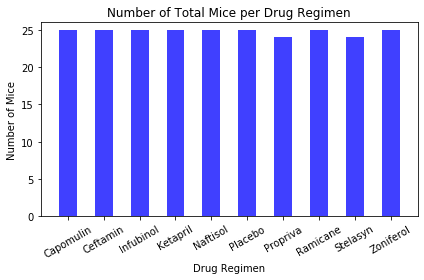

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Using pyplot to create bar graph to show 
# the number of total mice for each treatment regimen throughout the course of the study.
# Create drug list
drug_list=clean_study_data_complete["Drug Regimen"].unique()
drug_list.sort()

# Count the total mice per drug regimen, using nunique to return the total values.
mice_per_drug=clean_study_data_complete.groupby(['Drug Regimen']).nunique()
total_mice=mice_per_drug["Mouse ID"]

# Using pyplot to create bar graph.
x_axis=np.arange(0,len(drug_list))
tick_locations = [x for x in x_axis]

plt.title("Number of Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drug_list)-.25)
plt.ylim(0, max(total_mice) + 1)

plt.bar(x_axis, total_mice, facecolor="blue", alpha=0.75,width=0.5, align="center")
plt.xticks(tick_locations,drug_list,rotation=30)
plt.tight_layout()
plt.show()




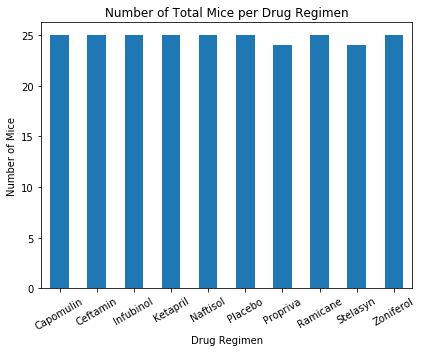

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create a DataFrame with Drug Regimen and Total Mice
mice_per_drug_df=pd.DataFrame(total_mice)
mice_per_drug_df.rename(columns={"Mouse ID":"Total Mice"},inplace=True)
mice_per_drug_df.reset_index()
# Using Pandas plot to plot the bar graph
df_plot=mice_per_drug_df.plot(kind='bar',rot=30,legend=False,figsize=(6,5),title="Number of Total Mice per Drug Regimen")
df_plot.set_ylabel('Number of Mice')

plt.tight_layout()
plt.show()




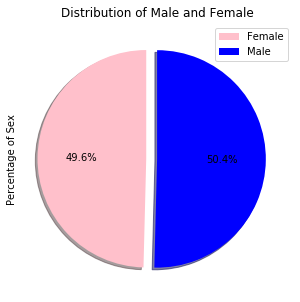

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Found the percentage for the male/female:
gender_set=clean_study_data_complete.groupby(['Mouse ID','Sex'])
gender_df=pd.DataFrame(gender_set.size())

gender_count=pd.DataFrame(gender_set.size())

gender_demo=pd.DataFrame(gender_count.groupby(['Sex']).count())
gender_demo.columns=["Total Count"]

gender_percentage=(gender_demo['Total Count']/gender_demo['Total Count'].sum())*100
gender_demo['Percentage of Sex']=gender_percentage.round(3)
gender_demo
# Using Pandas to plot pie chart
gender_demo.plot.pie(y='Percentage of Sex',figsize=(5,5),legend=True,labels=None,colors=('pink','blue'),startangle=90, shadow = True, autopct="%1.1f%%",explode=(0.1,0),title='Distribution of Male and Female')



Text(0.5, 1.0, 'Distribution of Male and Female')

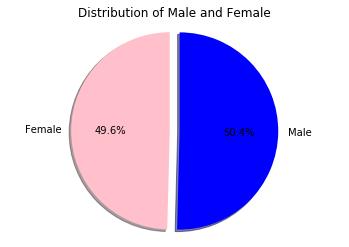

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Using Matplotlib to plot pie chart
labels='Female','Male'
sizes=[49.597,50.403]
colors=['Pink','Blue']
explode=[0.1,0]
plt.pie(sizes, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90,center=(0, 0),labels=labels)
plt.axis("equal")
plt.title("Distribution of Male and Female")





## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drug_regimen=["Capomulin","Ramicane","Infubinol","Ceftamin"]
final_df=pd.DataFrame()
for x in drug_regimen:
    drug_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == x]
    final_df=pd.concat([final_df,drug_df])      
final_sts=final_df.groupby('Mouse ID')
last_time=final_sts['Timepoint'].max()
last_tumor=final_sts['Tumor Volume (mm3)'].max()

final_sts_df=pd.DataFrame()
final_sts_df['Timepoint']=last_time
final_sts_df['Last Volume']=last_tumor
# Create a new df by merging this with original df
merged_df=pd.merge(final_sts_df,clean_study_data_complete,how='left',on=['Mouse ID','Timepoint'])
cleaned_df=merged_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
cleaned_grouped=cleaned_df.groupby(['Drug Regimen','Mouse ID'])


In [14]:
# Credit to stevewenlin, student in my bootcamp
# https://github.com/stevewenlin/matplotlib-hw

# Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for y in drug_regimen:
    final_tumor_vol = cleaned_df.loc[cleaned_df['Drug Regimen']== y, 'Tumor Volume (mm3)']
    tumor_volume.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 3)
    upperq = round(quartiles[0.75], 3)
    iqr = round(upperq-lowerq, 3)
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{y}'s outliers: {outliers}")

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


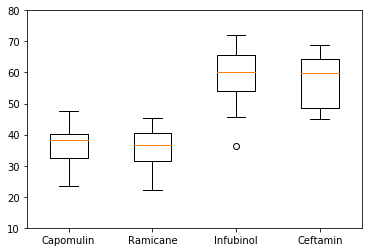

In [15]:
# Source https://github.com/terrylashley/Drug_Study_Analysis/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

grouped_regimens = merged_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
grouped_regimens_df = grouped_regimens.to_frame()
#Create a list to use as labels and dataframe
list_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_df = grouped_regimens_df.reset_index()
tumor_lists = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_lists_df = pd.DataFrame(tumor_lists)
tumor_lists_df = tumor_lists_df.reindex(list_regimen)
tumor_vols = [vol for vol in tumor_lists_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=list_regimen)
plt.ylim(10, 80)
plt.show()





## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

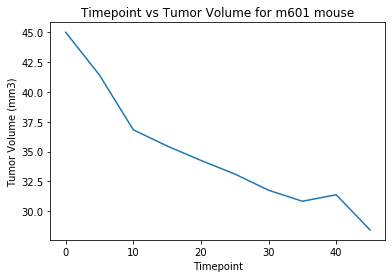

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df=clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen']=='Capomulin']
mouse=capo_df.loc[capo_df['Mouse ID']== 'm601']
                 
mouse_df=mouse[['Timepoint','Tumor Volume (mm3)']]
graph=mouse_df.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',legend=False,title='Timepoint vs Tumor Volume for m601 mouse')    
graph.set_xlabel('Timepoint')
graph.set_ylabel('Tumor Volume (mm3)')

    


Text(0, 0.5, 'Average Tumor Volume (mm3)')

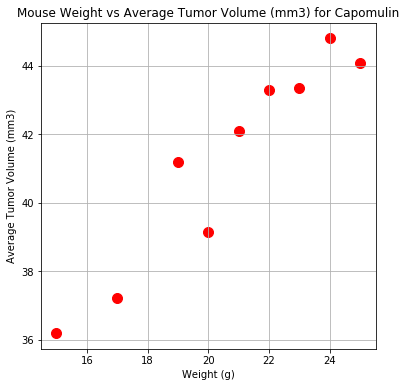

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df=capo_df.groupby('Weight (g)')
avg_tumor=weight_df['Tumor Volume (mm3)'].mean()
weight_vs_tumor=pd.DataFrame(avg_tumor).reset_index()
scatter=weight_vs_tumor.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',grid=True,figsize=(6,6),s=100,c='red',title='Mouse Weight vs Average Tumor Volume (mm3) for Capomulin')
scatter.set_ylabel('Average Tumor Volume (mm3)')



## Correlation and Regression

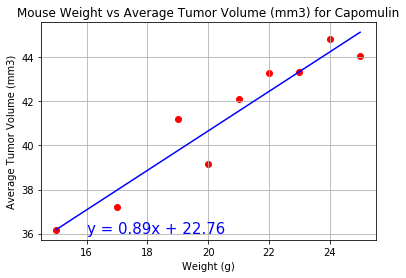

y = 0.89x + 22.76
0.89 indicates strong correlation between Mouse weight and Tumor Volume


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_tumor["Weight (g)"]
y_values = weight_vs_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolor='red')
plt.grid()
plt.plot(x_values,regress_values,'blue')
plt.annotate(line_eq,(16,36),fontsize=15,color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume (mm3) for Capomulin")
plt.show()
print(line_eq)
print(f'{str(round(slope,2))} indicates strong correlation between Mouse weight and Tumor Volume')
